# Fastai example

> Showing how to use fastai with a simple example.

In [ ]:
import pandas as pd
from pathlib import Path
import fastcore.all as fc

from fastai.data.all import *
from fastai.vision.all import *

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ossl_source = '../../_data/ossl-tfm/ossl-tfm.csv'
df = pd.read_csv(ossl_source); df.head()

,fname,kex
0,3998362dd2659e2252cd7f38b43c9b1f.png,0.182895
1,2bab4dbbac073b8648475ad50d40eb95.png,0.082741
2,29213d2193232be8867d85dec463ec00.png,0.089915
3,8b1ee9146c026faee20a40df86736864.png,0.135030
4,6e8e9d1105e7da7055555cb5d310df5f.png,0.270421


In [ ]:
# image size is 750x281

In [ ]:
ossl = DataBlock(blocks=(ImageBlock, RegressionBlock),
                get_x=ColReader(0, pref='../../_data/ossl-tfm/img/'),
                get_y=ColReader(1),
                batch_tfms=Normalize.from_stats(*imagenet_stats),
                item_tfms=RatioResize(100),
#    batch_tfms=aug_transforms()
)

In [ ]:
dls = ossl.dataloaders(df)

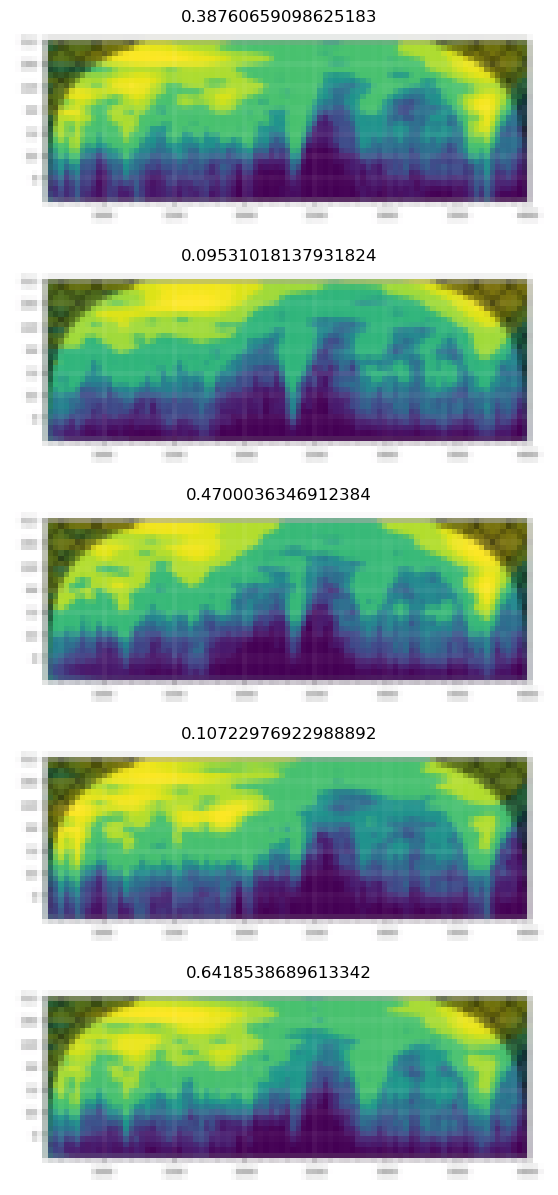

In [ ]:
dls.show_batch(nrows=5, ncols=1, figsize=(10, 15))

In [ ]:
learn = vision_learner(dls, resnet18, metrics=[mse,R2Score()])

SuggestedLRs(valley=0.0012022644514217973)

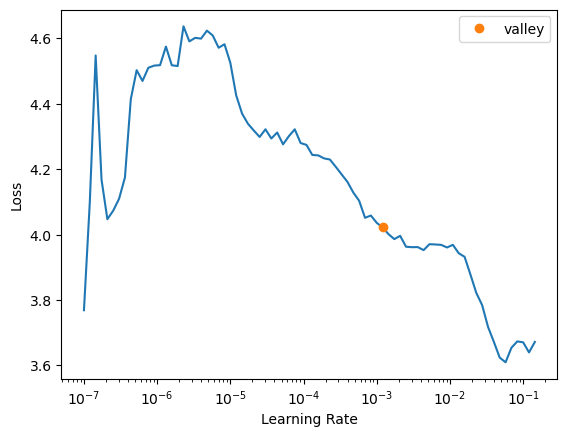

In [ ]:
learn.lr_find()

In [ ]:
# targeting mse of 0.36
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,mse,r2_score,time


FileNotFoundError: [Errno 2] No such file or directory: '/Users/franckalbinet/pro/dev/uhina/_data/ossl-tfm/img/cc9bc9f7be397abb646a25c1498d8465.png'